1.У вас, с прошлого урока, имеются реализации расчёта среднеквадратичной ошибки и её градиента для линейнй регрессии с коэффициентами при факторах(w) и свободным коэффициентам.
В этом задании вы должны модифицировать реализацию рассчёта среднеквадратичной ошибки и рассчёта её производной, так, чтобы с к среднеквадратичной ошибке добавлялась l2 регулярязационная поправка:  +𝑐∗∑𝑗𝑤2𝑗  а к градиенту- ссответствующее выражение для градиента регулярязационной поправки.

In [53]:
import numpy as np

In [54]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(1, n_features))

# сгенерируем матрицу X, вычислим Y с добавлением случайного шума
X = np.random.uniform(-7, 7, (n_objects, n_features))
Y = X.dot(w_true.T) + np.random.normal(0, 0.5, size=(n_objects, 1))

In [55]:
class linear_regression_l2:
    def _mserror(self, X, y_real, alpha):
        self.w = np.zeros((1, X.shape[1]))
        self.w0 = 0
        #расчёт среднеквадратичной ошибки с l2 регуляризационной поправкой
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0] + alpha * np.sum((np.insert(w, 0, w0))**2)
    def _mserror_grad(self, X, y_real, alpha):
        #расчёт градиента ошибки с l2 регуляризационной поправкой
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #(2 / y_real.shape[0]) * np.sum(delta) + 2 * alpha * self.w0 - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return (2 / y_real.shape[0])*np.sum(delta.T.dot(X))+2*alpha*np.sum(self.w), (2 / y_real.shape[0])*np.sum(delta)+2*alpha*self.w0

In [56]:
ex = linear_regression_l2()
ex._mserror(X, Y, 0.01)

60.47323125830096

In [57]:
ex._mserror_grad(X, Y, 0.01)

(-80.90136432283576, 0.267046326786772)

2.На основе этих функций создайте свою регуляризированную полиномиальную регрессию и опробуйте на одном из примеров построения полиномиальной модели из этого урока.
Пояснение:Для этого Вам достаточно создать класс, который наследуется от класса polynomial_regression из данного урока, и переопределить в нём методы mserror, mserror_grad(под переопределением подразумевается создание на новом классе методов с таким же названием).

In [68]:
import matplotlib
import matplotlib.pyplot as plt
from linear_regression import linear_regression
%matplotlib inline

In [69]:
class polynomial_regression(linear_regression):
    def __init__(self, max_power, *args, **kwargs):
        self.max_power=max_power
        super().__init__(*args, **kwargs)
    @staticmethod
    def generate_features(x, max_power):
        x=x[:, np.newaxis]
        return np.concatenate([x**i for i in range(1, max_power+1)], axis=1)
    def fit(self, x, y):
        super().fit(self.generate_features(x, self.max_power), y)
    def predict(self, x):
        return super().predict(self.generate_features(x, self.max_power)).flatten()
    def test(self, x, y):
        return super().test(self.generate_features(x, self.max_power), y)

In [70]:
class polynomial_regression_l2(polynomial_regression):
    def _mserror(self, X, y_real):
        self.w = np.zeros((1, X.shape[1]))
        self.w0 = 0
        #расчёт среднеквадратичной ошибки с l2 регуляризационной поправкой
        y = X.dot(self.w.T)+self.w0
        return np.sum((y - y_real)**2) / y_real.shape[0] + 0.1 * np.sum((np.insert(w, 0, w0))**2)
    
    def _mserror_grad(self, X, y_real):
        #расчёт градиента ошибки с l2 регуляризационной поправкой
        #2*delta.T.dot(X)/y_real.shape[0] - градиент по коэффициентам при факторах
        #(2 / y_real.shape[0]) * np.sum(delta) + 2 * alpha * self.w0 - производная(градиент) при нулевом коэффициенте
        delta=(X.dot(self.w.T)+self.w0-y_real)
        return (2 / y_real.shape[0])*np.sum(delta.T.dot(X))+2*0.1*np.sum(self.w), (2 / y_real.shape[0])*np.sum(delta)+2*0.1*self.w0
    

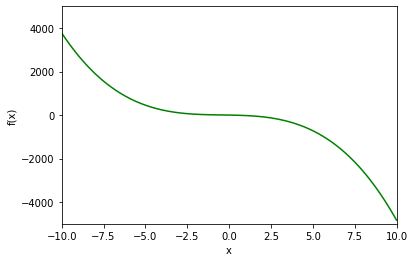

In [71]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
dots = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')

In [72]:
def f(x):
    return 0.6 - 13.2 * x - 5.3 * x ** 2 - 4.17 * x ** 3
np.random.seed(16)
x_data = np.random.uniform(-10, 10, 10)
f_data = [f(i) for i in x_data] + np.random.uniform(-1000, 1000, 10)

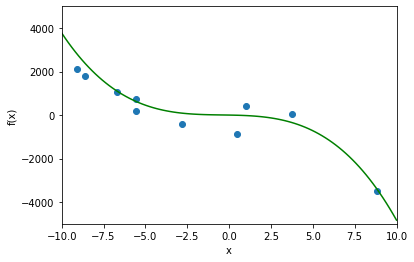

In [73]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

In [74]:
mod=polynomial_regression_l2(2)
mod.fit(x_data, f_data)

print(mod.w)
print(mod.w0)

[[-0.81426871 -0.81426871]]
149.70076292363996


In [75]:
mod.predict(x_data)

array([129.2683569 , 149.14878402, 148.03779479,  89.84950931,
       145.65127463, 129.23388691, 135.02637948, 118.34714227,
        96.56583276,  79.17169859])

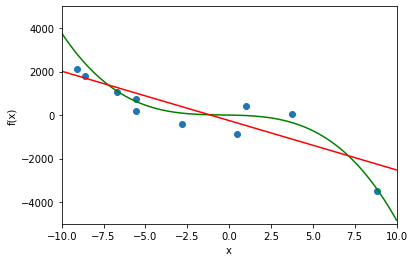

In [76]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(1)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

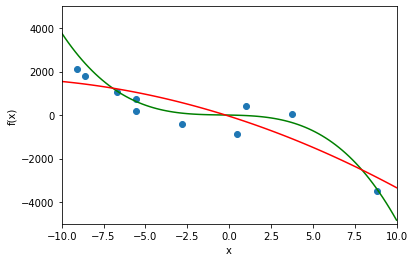

In [77]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(2)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

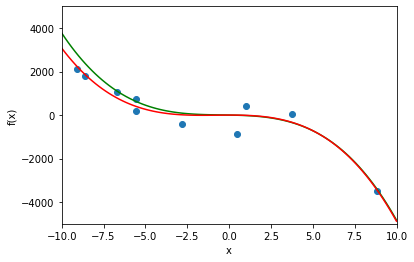

In [79]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(3)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')

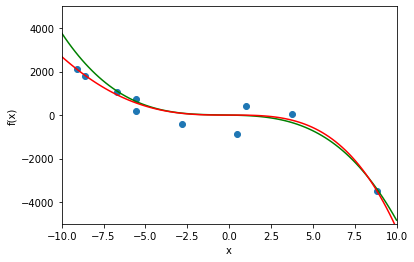

In [81]:
#Актуальные данные
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)
plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data)

#Наша модель
model1 = polynomial_regression(4, 0.01)
model1.fit(x_data, f_data)
plt.plot(dots, model1.predict(dots), color='r')